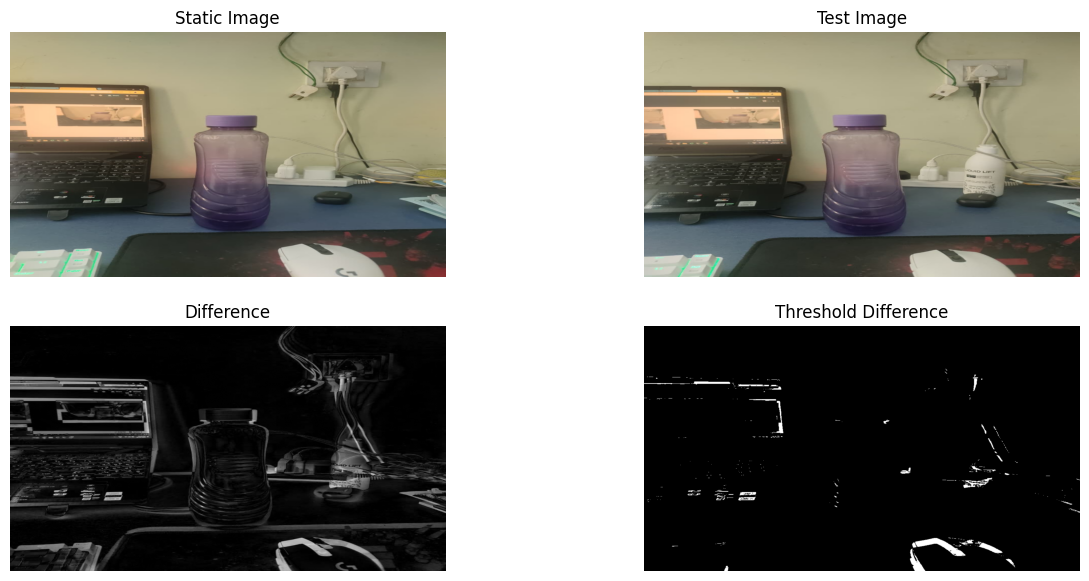

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils
import time
import os

# load and preprocess the images
def load_and_preprocess(image_path):
    image = cv2.imread(image_path)

    if image is None:
        raise FileNotFoundError(f"Could not load image from path: {image_path}")

    image = cv2.resize(image, (1280, 720))
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return image, gray_image

# subtract image
def subtract_image(image1, image2):
    diff = cv2.absdiff(image1, image2)
    _, thresh = cv2.threshold(diff, 100, 255, cv2.THRESH_BINARY)
    return diff, thresh


# Paths
image_path1 = "C:/Users/prajw/Desktop/Puneeth study/python/GenAI/OpenCV/image2.jpg"
image_path2 = "C:/Users/prajw/Desktop/Puneeth study/python/GenAI/OpenCV/image3.jpg"


# Load
image1, gray_image1 = load_and_preprocess(image_path1)
image2, gray_image2 = load_and_preprocess(image_path2)

# Subtract
diff, thresh = subtract_image(gray_image1, gray_image2)

# Plot
plt.figure(figsize=(15, 7))

plt.subplot(2,2,1)
plt.title("Static Image")
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title("Test Image")
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title("Difference")
plt.imshow(diff, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title("Threshold Difference")
plt.imshow(thresh, cmap='gray')
plt.axis('off')

plt.show()


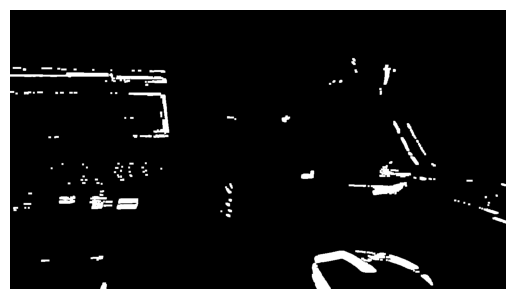

In [3]:
dilate_image=cv2.dilate(thresh,None,iterations=2)
plt.imshow(dilate_image,cmap='gray')
plt.axis('off')
plt.show()

In [4]:
cnts=cv2.findContours(dilate_image.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts=imutils.grab_contours(cnts)
# cnts


In [5]:
#iterate the contours
for c in cnts:
  if cv2.contourArea(c)<700:
    continue
  
  (x,y,w,h)=cv2.boundingRect(c)
  cv2.rectangle(image2,(x,y),(x+w,y+h),(0,255,0),2)
cv2.imshow('test',image2)
cv2.waitKey(10000)
cv2.destroyAllWindows()

Test In realtime / video

In [ ]:
video_path='C:/Users/prajw/Desktop/Puneeth study/python/GenAI/OpenCV/test.mp4'
# video_cap=cv2.VideoCapture(0)
video_cap=cv2.VideoCapture(video_path)
static_frame=None

while True:
    success, frame = video_cap.read()
    if not success:
        break
    
    frame = cv2.resize(frame, (1280, 720))
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    if static_frame is None:
        static_frame = gray_frame
        continue
    
    diff, thresh = subtract_image(static_frame, gray_frame)
    dilate_image = cv2.dilate(thresh, None, iterations=2)
    
    cnts = cv2.findContours(dilate_image.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    
    for c in cnts:
        if cv2.contourArea(c) < 700:
            continue
        (x, y, w, h) = cv2.boundingRect(c)
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # <-- Move this inside the loop
    cv2.imshow("Motion Detection", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):  # Press 'q' to quit
        break

    time.sleep(1)
